# Create Dataset and helper functions

In [2]:
import cv2
import os
import shutil
from pathlib import Path
import matplotlib.pyplot as plt
import math
import shutil
import numpy as np

In [3]:
def save_frame(path, frame):
    """
    Saves grayscale tensor to PNG image
    :param path: The path (with .png)
    :param frame: Frame to save
    :return: boolean: success
    """
    if not path.endswith('.png'):
        print('Path does not end with .png')
        return False
    return cv2.imwrite(path, frame, [int(cv2.IMWRITE_PNG_COMPRESSION), 0])

In [4]:
def extract_frames(video_path, output_folder, interval_sec=0.5):
    """
    Extracts frames from video
    :param video_path: The video path
    :param output_folder: The output folder where every frame will be saved
    :param interval_sec: The interval between frames
    :return: boolean: success
    """
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Cannot open video.")
        return False

    _, video_name = os.path.split(video_path)
    video_name_without_ext, _ = os.path.splitext(video_name)

    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = total_frames / fps
    print(f"FPS: {fps}, Total Frames: {total_frames}, Duration: {duration:.2f} sec")

    frame_interval = int(fps * interval_sec)
    frame_idx = 0
    saved_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_idx % frame_interval == 0:
            filename = os.path.join(output_folder, video_name_without_ext + f"_{saved_count:04d}.png")
            save_frame(filename, frame)
            saved_count += 1

        frame_idx += 1

    cap.release()
    print(f"Extracted {saved_count} frames.")
    return True

In [5]:
extract_frames(os.path.join("test", "250905_GHW_1_HD_1_M0.avi"), output_folder=os.path.join("test", "250905_GHW_1_HD_1_M0"), interval_sec=0.2)

FPS: 30.0, Total Frames: 255, Duration: 8.50 sec
Extracted 43 frames.


True

In [6]:
def duplicate_file(src, dest):
    return shutil.copyfile(src, dest)

In [ ]:
for i in range(1, 43):
    duplicate_file("data/eye/train_masks/250905_GHW_1_HD_1_M0_0000_mask.png", f"data/eye/train_masks/250905_GHW_1_HD_1_M0_{i:04d}_mask.png")

In [4]:
def rename_files_sequentially(directory: str, extension: str = ".png"):
    """
    Renames all files in a directory to sequential names like 0001.png, 0002.png, ...

    Args:
        directory (str): Path to the directory containing files.
        extension (str): Desired extension for renamed files (default: ".png").
    """
    dir_path = Path(directory).resolve()

    files = sorted([f for f in dir_path.iterdir() if f.is_file()])

    for i, file in enumerate(files, start=1):
        new_name = f"{i:04d}{extension}"
        new_path = dir_path / new_name
        file.rename(new_path)

    print(f"Renamed {len(files)} files in {dir_path}")

In [5]:
rename_files_sequentially("./data/eye/train")

Renamed 804 files in C:\Users\Domodekavkaz\Documents\Stage\papillae_detection\data\eye\train


---

In [9]:
def read_paths(file_path: str):
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            path = line.strip()
            if path:  # skip empty lines
                yield str(Path(path).resolve())

In [10]:
i = 0
for p in read_paths("pngs.txt"):
    duplicate_file(p, f"data/eye/train/{i:04d}.png")
    i += 1

In [21]:
mask_path = "datasets/segmentation/val/images"
image_path = "data/eye/train"
put_to = "datasets/segmentation/val/tmp"

for filename in os.listdir(mask_path):
    src = os.path.join(image_path, filename)
    dst = os.path.join(put_to, filename)
    shutil.copy(src, dst)
    print(f"Copied {filename} to {dst}")

Copied 0328.png to datasets/segmentation/val/tmp\0328.png
Copied 0329.png to datasets/segmentation/val/tmp\0329.png
Copied 0330.png to datasets/segmentation/val/tmp\0330.png
Copied 0331.png to datasets/segmentation/val/tmp\0331.png
Copied 0332.png to datasets/segmentation/val/tmp\0332.png
Copied 0333.png to datasets/segmentation/val/tmp\0333.png
Copied 0334.png to datasets/segmentation/val/tmp\0334.png
Copied 0335.png to datasets/segmentation/val/tmp\0335.png
Copied 0336.png to datasets/segmentation/val/tmp\0336.png
Copied 0337.png to datasets/segmentation/val/tmp\0337.png
Copied 0338.png to datasets/segmentation/val/tmp\0338.png
Copied 0339.png to datasets/segmentation/val/tmp\0339.png
Copied 0340.png to datasets/segmentation/val/tmp\0340.png
Copied 0341.png to datasets/segmentation/val/tmp\0341.png
Copied 0342.png to datasets/segmentation/val/tmp\0342.png
Copied 0343.png to datasets/segmentation/val/tmp\0343.png
Copied 0344.png to datasets/segmentation/val/tmp\0344.png
Copied 0345.pn

In [6]:
folder = "datasets/classification/val/left"
ext = ".png"

for filename in os.listdir(folder):
    new_name = filename[:4] + ext
    old_path = os.path.join(folder, filename)
    new_path = os.path.join(folder, new_name)
    os.rename(old_path, new_path)
    print(f"Renamed {new_name} from {old_path} to {new_path}")

Renamed 0042.png from datasets/classification/val/left\0042_png.rf.915be2c3ca71b96fb62fec1537df82a6.jpg to datasets/classification/val/left\0042.png
Renamed 0046.png from datasets/classification/val/left\0046_png.rf.ca7b53056af71aad53c60cef96404aa0.jpg to datasets/classification/val/left\0046.png
Renamed 0051.png from datasets/classification/val/left\0051_png.rf.f946821c8f9b5bfc573479dab04d1e54.jpg to datasets/classification/val/left\0051.png
Renamed 0065.png from datasets/classification/val/left\0065_png.rf.4134fe84e272f93bb78a3693f24243b9.jpg to datasets/classification/val/left\0065.png
Renamed 0078.png from datasets/classification/val/left\0078_png.rf.760d11e048051a2c2f4c38fedaa1e94b.jpg to datasets/classification/val/left\0078.png
Renamed 0084.png from datasets/classification/val/left\0084_png.rf.9e7375120761e632586eb17660d8eb66.jpg to datasets/classification/val/left\0084.png
Renamed 0091.png from datasets/classification/val/left\0091_png.rf.86bae0999c5766f7cbd69896e13d498d.jpg to

In [8]:
folder = "datasets/segmentation/optic_disk/train/labels"

for filename in os.listdir(folder):
    if "_mask" in filename:
        new_name = filename.replace("_mask", "")
        old_path = os.path.join(folder, filename)
        new_path = os.path.join(folder, new_name)
        os.rename(old_path, new_path)
        print(f"Renamed: {filename} → {new_name}")

Renamed: 0162_mask.txt → 0162.txt
Renamed: 0163_mask.txt → 0163.txt
Renamed: 0164_mask.txt → 0164.txt
Renamed: 0165_mask.txt → 0165.txt
Renamed: 0166_mask.txt → 0166.txt
Renamed: 0167_mask.txt → 0167.txt
Renamed: 0168_mask.txt → 0168.txt
Renamed: 0169_mask.txt → 0169.txt
Renamed: 0170_mask.txt → 0170.txt
Renamed: 0171_mask.txt → 0171.txt
Renamed: 0172_mask.txt → 0172.txt
Renamed: 0173_mask.txt → 0173.txt
Renamed: 0174_mask.txt → 0174.txt
Renamed: 0175_mask.txt → 0175.txt
Renamed: 0176_mask.txt → 0176.txt
Renamed: 0177_mask.txt → 0177.txt
Renamed: 0178_mask.txt → 0178.txt
Renamed: 0179_mask.txt → 0179.txt
Renamed: 0180_mask.txt → 0180.txt
Renamed: 0181_mask.txt → 0181.txt
Renamed: 0182_mask.txt → 0182.txt
Renamed: 0183_mask.txt → 0183.txt
Renamed: 0184_mask.txt → 0184.txt
Renamed: 0185_mask.txt → 0185.txt
Renamed: 0186_mask.txt → 0186.txt
Renamed: 0187_mask.txt → 0187.txt
Renamed: 0188_mask.txt → 0188.txt
Renamed: 0189_mask.txt → 0189.txt
Renamed: 0190_mask.txt → 0190.txt
Renamed: 0191_

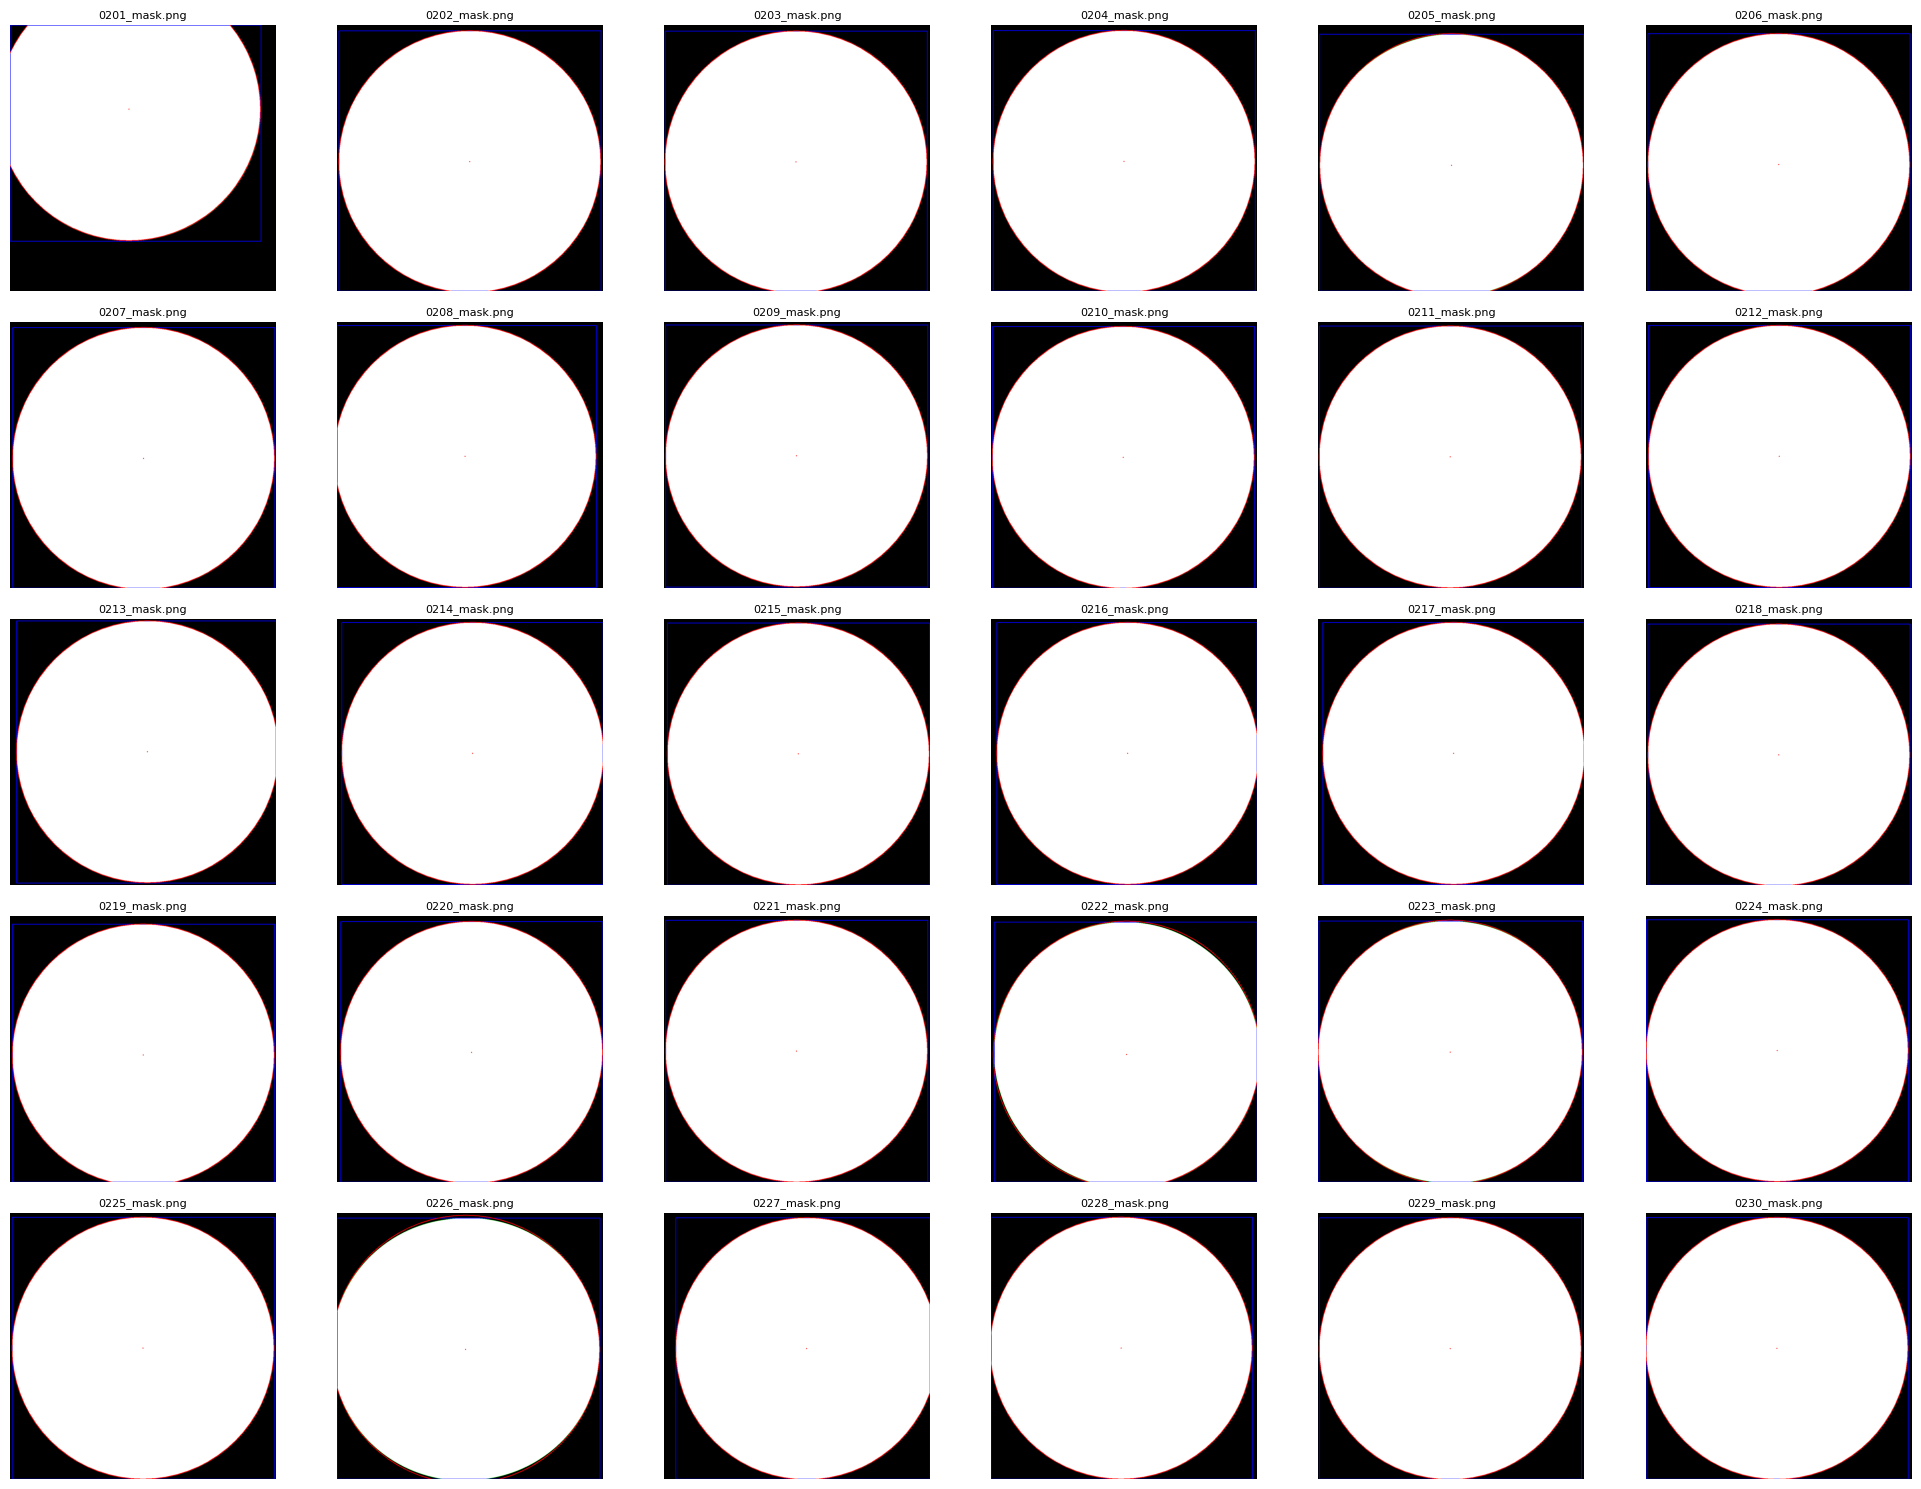

In [11]:
# Path to your mask folder
masks_dir = Path("data/eye/train_masks")

# Get first 30 masks
mask_paths = sorted(masks_dir.glob("*.png"))[200:230]

# Create display grid
plt.figure(figsize=(20, 15))

for i, mask_path in enumerate(mask_paths):
    # Read grayscale mask
    mask = cv2.imread(str(mask_path), cv2.IMREAD_GRAYSCALE)
    h, w = mask.shape

    # Binarize
    _, mask_bin = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(mask_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        print(f"No contour found in {mask_path.name}")
        continue

    contour = max(contours, key=cv2.contourArea)

    # Bounding box
    x, y, bw, bh = cv2.boundingRect(contour)

    # Enclosing circle
    (xc, yc), radius = cv2.minEnclosingCircle(contour)
    center = (int(xc), int(yc))
    radius = int(radius)

    # Prepare visualization
    vis = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

    # Draw contour (green)
    cv2.drawContours(vis, [contour], -1, (0, 255, 0), 1)

    # Draw bounding box (red)
    cv2.rectangle(vis, (x, y), (x + bw, y + bh), (0, 0, 255), 2)

    # Draw enclosing circle (blue)
    cv2.circle(vis, center, radius, (255, 0, 0), 2)
    cv2.circle(vis, center, 2, (255, 0, 0), -1)  # dot at center

    # Display
    plt.subplot(5, 6, i + 1)
    plt.imshow(vis)
    plt.title(mask_path.name, fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [12]:
# Paths
masks_dir = Path("data/eye/train_masks")
labels_dir = Path("data/eye/train_labels")
labels_dir.mkdir(parents=True, exist_ok=True)

# Single class
class_id = 0  # you can change this if needed

for mask_path in masks_dir.glob("*.png"):
    # Read mask in grayscale
    mask = cv2.imread(str(mask_path), cv2.IMREAD_GRAYSCALE)
    h, w = mask.shape

    # Threshold to ensure binary mask
    _, mask_bin = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(mask_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        print(f"No contour found in {mask_path.name}")
        continue

    # Find largest contour (since there’s only one circle)
    contour = max(contours, key=cv2.contourArea)

    # Get bounding box
    x, y, bw, bh = cv2.boundingRect(contour)

    # Convert to YOLO normalized format
    x_center = (x + bw / 2) / w
    y_center = (y + bh / 2) / h
    bw /= w
    bh /= h

    # Write YOLO label file
    label_path = labels_dir / f"{mask_path.stem}.txt"
    with open(label_path, "w") as f:
        f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {bw:.6f} {bh:.6f}\n")

In [7]:
# Paths
masks_dir = Path("datasets/segmentation/optic_disk/train/images")       # Folder with binary PNGs
labels_dir = Path("datasets/segmentation/optic_disk/train/labels")     # Output folder for YOLO segmentation labels
labels_dir.mkdir(parents=True, exist_ok=True)

# One class only
CLASS_ID = 0

for mask_path in masks_dir.glob("*.png"):
    # Read mask as grayscale
    mask = cv2.imread(str(mask_path), cv2.IMREAD_GRAYSCALE)
    h, w = mask.shape

    # Threshold to ensure binary
    _, mask_bin = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

    # Find contours (external only)
    contours, _ = cv2.findContours(mask_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    label_path = labels_dir / f"{mask_path.stem}.txt"

    with open(label_path, "w") as f:
        for contour in contours:
            # Flatten contour and normalize
            contour = contour.squeeze()
            if len(contour.shape) != 2:  # skip empty contours
                continue

            normalized = []
            for x, y in contour:
                normalized.append(f"{x / w:.6f}")
                normalized.append(f"{y / h:.6f}")

            # Write one line per object
            f.write(f"{CLASS_ID} " + " ".join(normalized) + "\n")

print("✅ Conversion complete! Labels saved in:", labels_dir)

✅ Conversion complete! Labels saved in: datasets\segmentation\optic_disk\train\labels


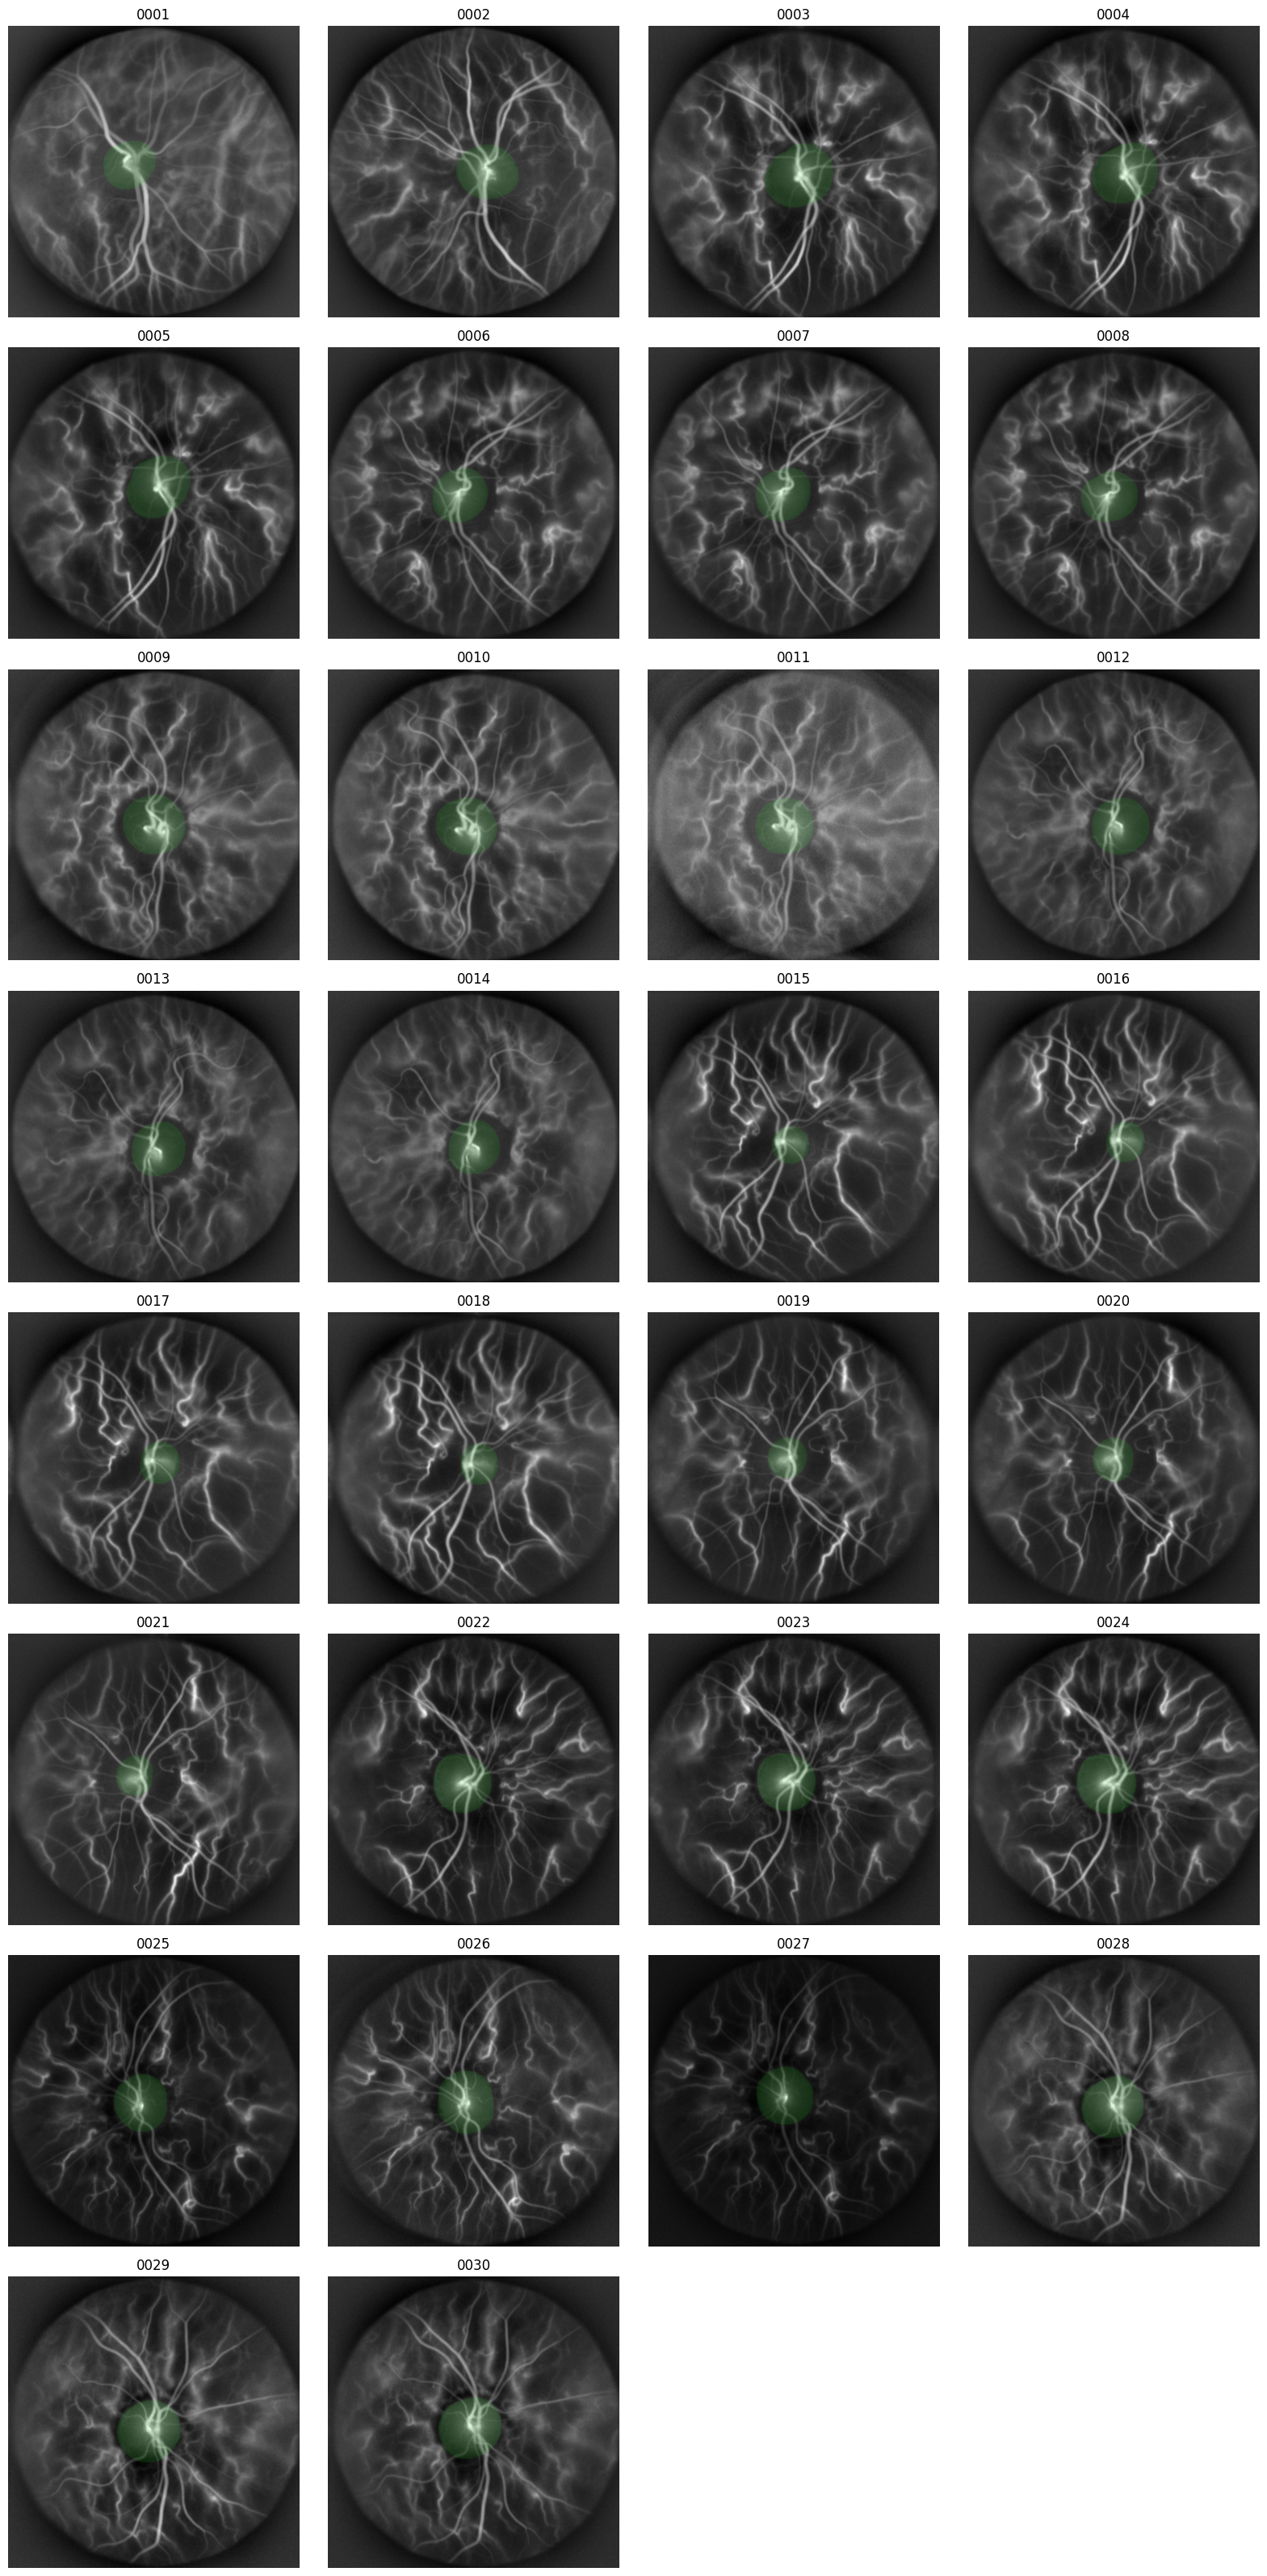

In [14]:
# Paths
images_dir = Path("datasets/segmentation/optic_disk/val/images")   # Folder with your original images
labels_dir = Path("datasets/segmentation/optic_disk/val/labels")   # Folder with YOLO .txt segmentation labels

# Number of samples to show
N = 30

# Get list of image paths
image_paths = sorted(list(images_dir.glob("*.png")))[:N]

def load_yolo_polygons(label_path, w, h):
    polygons = []
    if not label_path.exists():
        return polygons
    with open(label_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) < 3:
                continue
            coords = np.array(list(map(float, parts[1:])))
            pts = coords.reshape(-1, 2)
            pts[:, 0] *= w
            pts[:, 1] *= h
            polygons.append(pts.astype(np.int32))
    return polygons

cols = 4
rows = int(np.ceil(N / cols))
plt.figure(figsize=(4 * cols, 4 * rows))

for i, image_path in enumerate(image_paths):
    label_path = labels_dir / (image_path.stem + ".txt")
    img = cv2.imread(str(image_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    polygons = load_yolo_polygons(label_path, w, h)

    # Create transparent overlay
    overlay = img.copy()
    for pts in polygons:
        cv2.fillPoly(overlay, [pts], color=(0, 255, 0))  # green fill
        cv2.polylines(overlay, [pts], isClosed=True, color=(0, 255, 0), thickness=2)

    # Blend overlay with original image (alpha = 0.1 means 10% green)
    blended = cv2.addWeighted(overlay, 0.1, img, 0.9, 0)

    plt.subplot(rows, cols, i + 1)
    plt.imshow(blended)
    plt.axis("off")
    plt.title(image_path.stem)

plt.tight_layout()
plt.show()